<a href="https://colab.research.google.com/github/vanshika2424/Autismpredictionml/blob/main/Autism_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn
import matplotlib.pyplot as plt


In [ ]:
train_file='/content/train (1).csv'

df_train = pd.read_csv(train_file)


In [ ]:
df_train


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


In [ ]:
df_train['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [ ]:
df_train['relation'].value_counts()

,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [ ]:
df_train = df_train.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

<ipython-input-9-810e5f5d6bca>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train = df_train.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


In [ ]:
df_train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,Others,0,0,Austria,0,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,India,0,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,Others,0,0,United States,0,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,South Africa,0,-4.777286,18 and more,Self,0


In [ ]:
df_train['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
Others,235
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Latino,17
Hispanic,9


In [ ]:
df_train['relation'].value_counts()

,count
relation,
Self,709
Others,42
Parent,29
Relative,18
Health care professional,2


In [ ]:
df_train.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
df_train=df_train.drop(['ID'],axis=1)

In [ ]:
df_train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,...,f,Others,0,0,Austria,0,6.351166,18 and more,Self,0
1,0,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,India,0,2.255185,18 and more,Self,0
2,1,1,1,1,1,1,1,1,1,1,...,m,White-European,0,1,United States,0,14.851484,18 and more,Self,1
3,0,0,0,0,0,0,0,0,0,0,...,f,Others,0,0,United States,0,2.276617,18 and more,Self,0
4,0,0,0,0,0,0,0,0,0,0,...,m,Others,0,0,South Africa,0,-4.777286,18 and more,Self,0


<Axes: xlabel='gender', ylabel='count'>

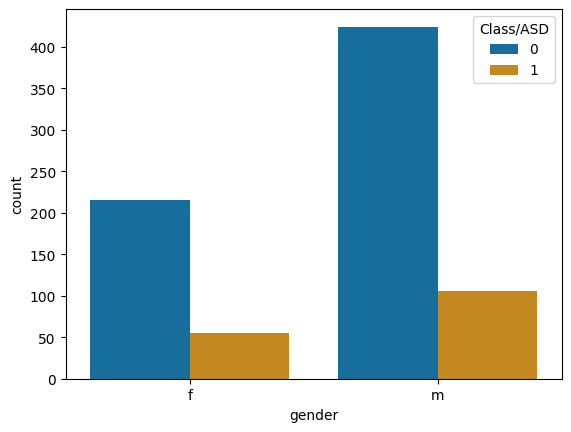

In [ ]:
seaborn.countplot(x='gender',hue='Class/ASD',data=df_train,palette='colorblind')

In [ ]:
df_train['gender'].value_counts()

,count
gender,
m,530
f,270


<Axes: xlabel='age_desc', ylabel='count'>

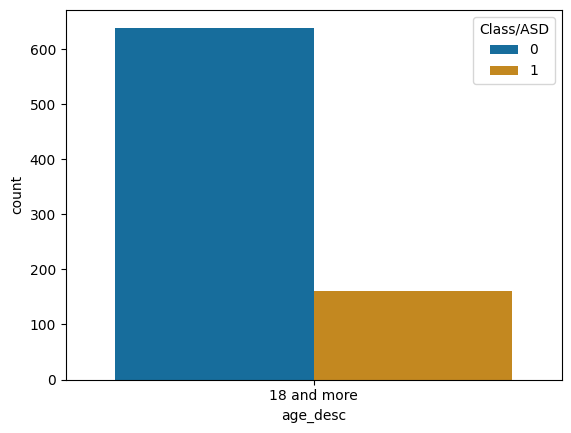

In [ ]:
seaborn.countplot(x='age_desc',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='austim', ylabel='count'>

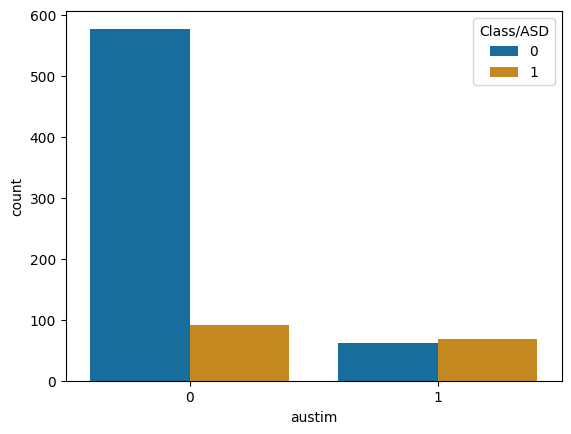

In [ ]:
seaborn.countplot(x='austim',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='jaundice', ylabel='count'>

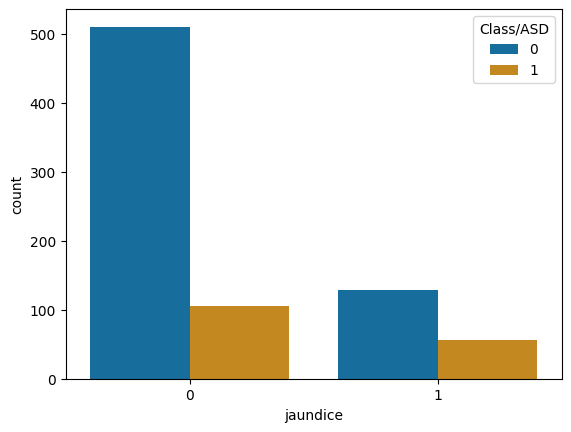

In [ ]:
seaborn.countplot(x='jaundice',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='contry_of_res', ylabel='count'>

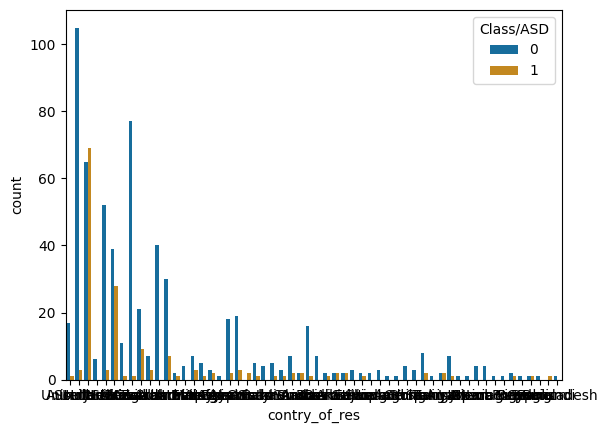

In [ ]:
seaborn.countplot(x='contry_of_res',hue='Class/ASD',data=df_train,palette='colorblind')

In [ ]:
country_scores = df_train.pivot_table(index='contry_of_res',columns='Class/ASD',values ='gender',aggfunc='count',
                        fill_value=0).reset_index()
country_order = country_scores.sort_values(by=1,ascending=False).contry_of_res
country_order

,contry_of_res
54,United States
53,United Kingdom
15,Canada
6,Australia
0,Afghanistan
32,Kazakhstan
31,Jordan
25,India
21,France
47,Spain


In [ ]:
country_order = df_train['contry_of_res'].unique()

<Axes: xlabel='count', ylabel='contry_of_res'>

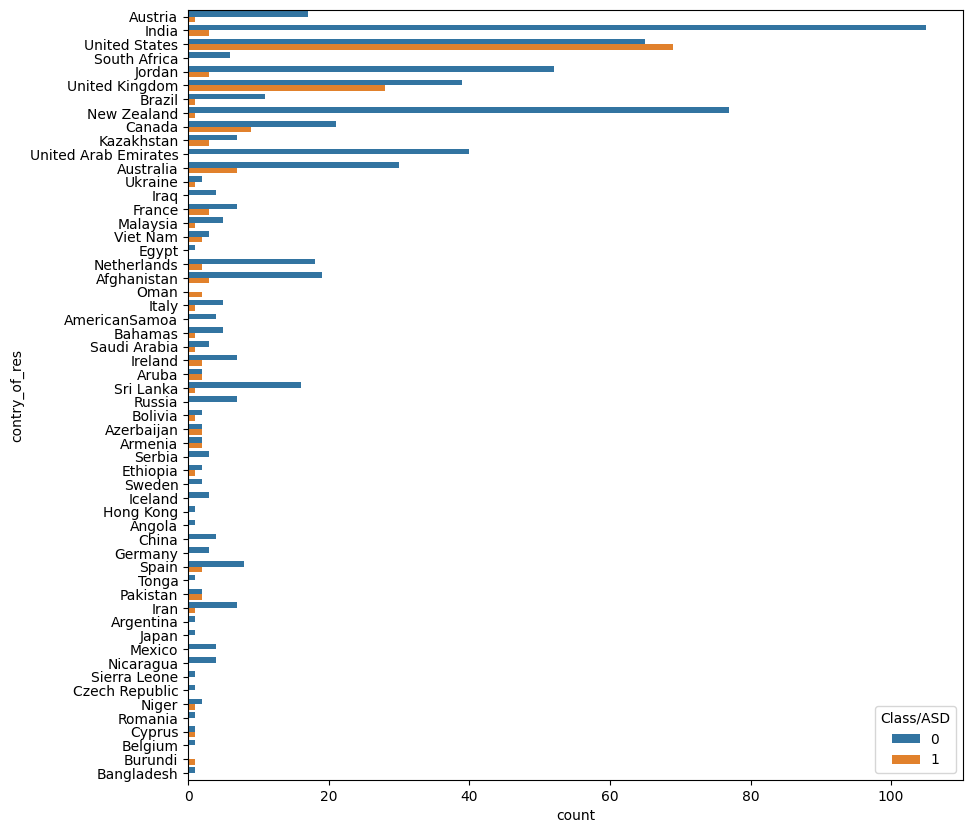

In [ ]:
plt.figure(figsize=(10,10))
seaborn.countplot(y = 'contry_of_res',hue='Class/ASD', data = df_train,order=country_order)

<Axes: xlabel='used_app_before', ylabel='count'>

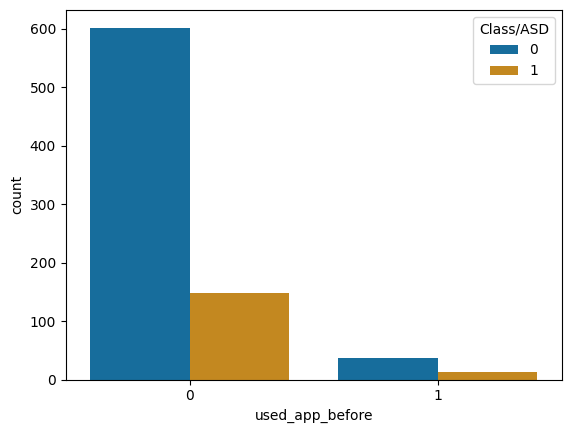

In [ ]:
seaborn.countplot(x='used_app_before',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='relation', ylabel='count'>

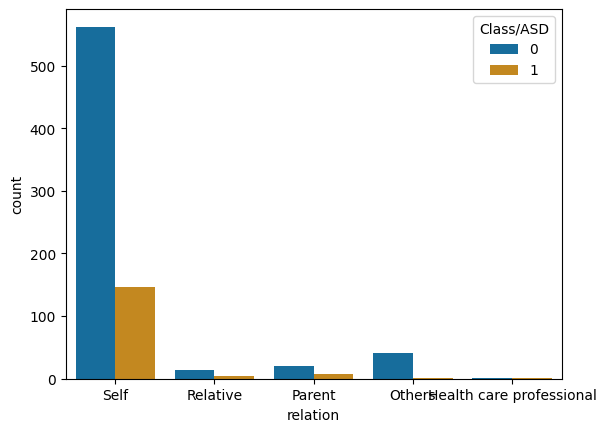

In [ ]:
seaborn.countplot(x='relation',hue='Class/ASD',data=df_train,palette='colorblind')

<Axes: xlabel='age', ylabel='count'>

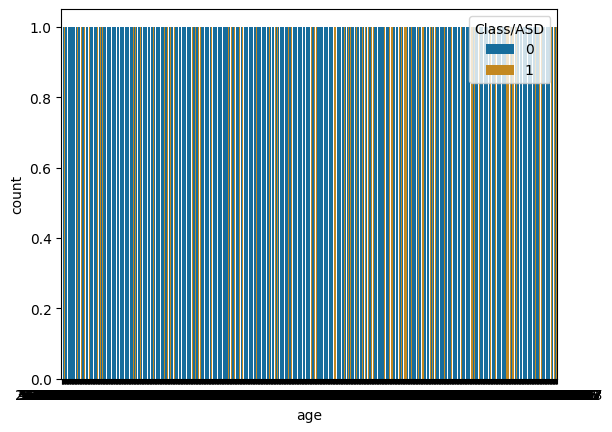

In [ ]:
seaborn.countplot(x='age',hue='Class/ASD',data=df_train,palette='colorblind')

Text(0.5, 0, 'Age (years)')

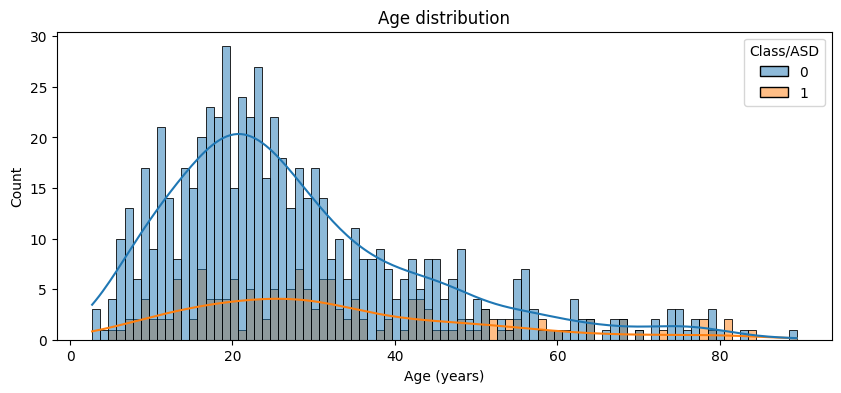

In [ ]:
plt.figure(figsize=(10,4))


seaborn.histplot(data=df_train, x='age', hue='Class/ASD', binwidth=1, kde=True)


plt.title('Age distribution')
plt.xlabel('Age (years)')

<Axes: xlabel='result', ylabel='Count'>

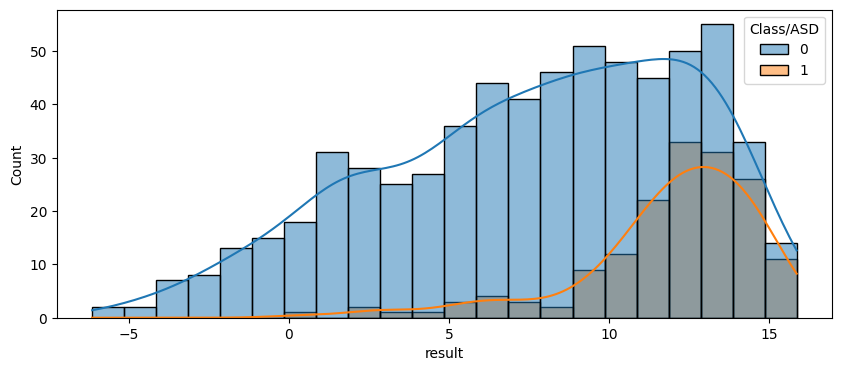

In [ ]:
plt.figure(figsize=(10,4))
seaborn.histplot(data=df_train, x='result', hue='Class/ASD', binwidth=1, kde=True)

In [ ]:
df=df_train.drop(['age_desc'],axis=1)

In [ ]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,0,0,Austria,0,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,0,0,India,0,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,0,1,United States,0,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,0,0,United States,0,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,0,0,South Africa,0,-4.777286,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,0,0,New Zealand,0,12.999501,Self,0
796,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,0,0,Cyprus,0,13.561518,Self,0
797,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,1,0,New Zealand,0,2.653177,Self,0
798,0,0,0,0,0,0,0,0,0,0,16.414305,f,Others,0,0,Canada,0,9.069342,Self,0


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns


from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

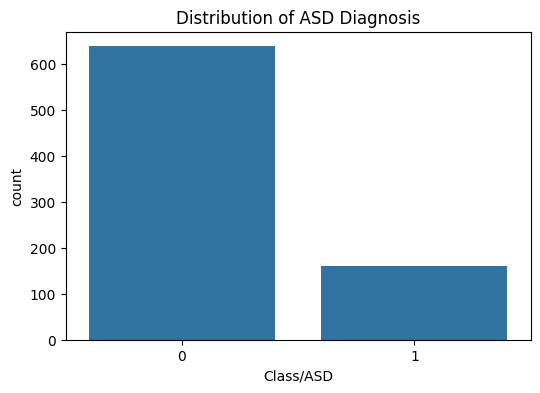

In [ ]:
plt.figure(figsize=(6, 4))
seaborn.countplot(x='Class/ASD', data=df)
plt.title('Distribution of ASD Diagnosis')
plt.show()

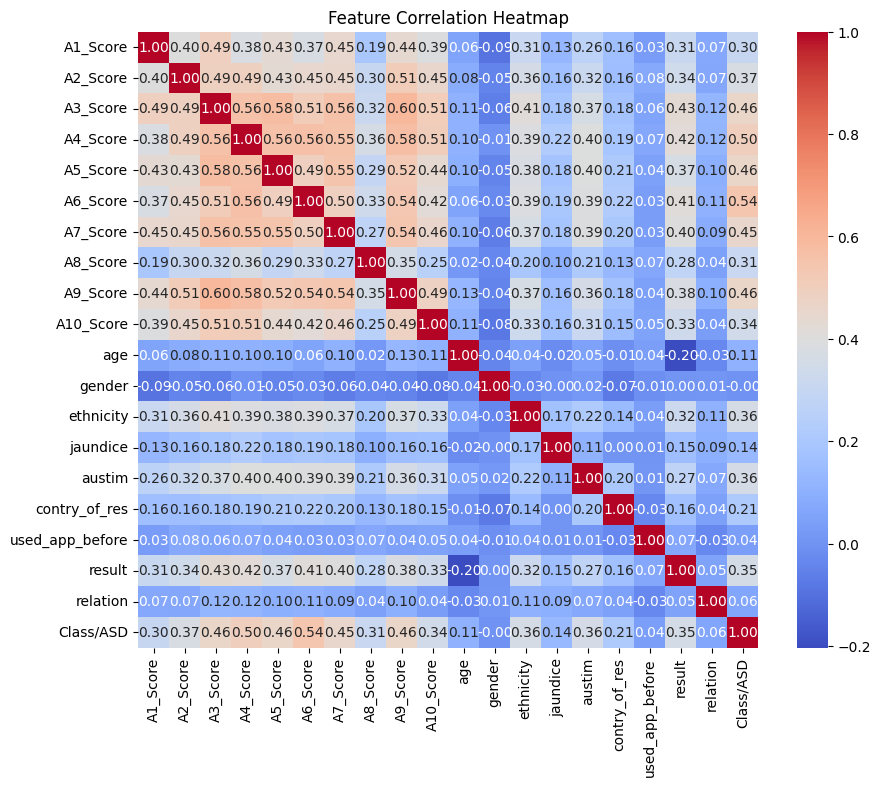

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
seaborn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
removal = ['used_app_before', 'austim', 'Class/ASD']  # Adjust this as needed
features = df.drop(removal, axis=1)
target = df['Class/ASD']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Dictionary to store results
results = {}

# Function to train and evaluate each model with training and validation accuracy
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)

    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Calculate evaluation metrics for test set (validation accuracy)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Store the results in a dictionary
    results[model_name] = {
        'Train Accuracy': train_accuracy,
        'Validation Accuracy': test_accuracy,
        'Train Precision': train_precision,
        'Validation Precision': test_precision,
        'Train Recall': train_recall,
        'Validation Recall': test_recall,
        'Train F1 Score': train_f1,
        'Validation F1 Score': test_f1
    }

    # Print the results for each model
    print(f"{model_name} Results:")
    print(f"Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {test_accuracy:.2f}")
    print(f"Training Precision: {train_precision:.2f}, Validation Precision: {test_precision:.2f}")
    print(f"Training Recall: {train_recall:.2f}, Validation Recall: {test_recall:.2f}")
    print(f"Training F1 Score: {train_f1:.2f}, Validation F1 Score: {test_f1:.2f}\n")

# Initialize each model and evaluate
# 1. Logistic Regression
logistic_regression = LogisticRegression()
evaluate_model(logistic_regression, "Logistic Regression")

# 2. Random Forest
random_forest = RandomForestClassifier()
evaluate_model(random_forest, "Random Forest")

# 3. XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgboost, "XGBoost")

# 4. Support Vector Machine (SVM)
svm = SVC()
evaluate_model(svm, "Support Vector Machine")

# 5. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
evaluate_model(knn, "K-Nearest Neighbors")

# 6. Naive Bayes
naive_bayes = GaussianNB()
evaluate_model(naive_bayes, "Naive Bayes")

# Print a summary of all models' results in a DataFrame
print("Summary of Model Performance:\n", pd.DataFrame(results).T)


Logistic Regression Results:
Training Accuracy: 0.88, Validation Accuracy: 0.87
Training Precision: 0.70, Validation Precision: 0.73
Training Recall: 0.69, Validation Recall: 0.67
Training F1 Score: 0.70, Validation F1 Score: 0.70

Random Forest Results:
Training Accuracy: 1.00, Validation Accuracy: 0.84
Training Precision: 1.00, Validation Precision: 0.68
Training Recall: 1.00, Validation Recall: 0.58
Training F1 Score: 1.00, Validation F1 Score: 0.63

XGBoost Results:
Training Accuracy: 1.00, Validation Accuracy: 0.84
Training Precision: 1.00, Validation Precision: 0.66
Training Recall: 1.00, Validation Recall: 0.58
Training F1 Score: 1.00, Validation F1 Score: 0.62

Support Vector Machine Results:
Training Accuracy: 0.90, Validation Accuracy: 0.86
Training Precision: 0.75, Validation Precision: 0.71
Training Recall: 0.73, Validation Recall: 0.61
Training F1 Score: 0.74, Validation F1 Score: 0.66



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:47:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


K-Nearest Neighbors Results:
Training Accuracy: 0.90, Validation Accuracy: 0.88
Training Precision: 0.71, Validation Precision: 0.72
Training Recall: 0.78, Validation Recall: 0.72
Training F1 Score: 0.74, Validation F1 Score: 0.72

Naive Bayes Results:
Training Accuracy: 0.83, Validation Accuracy: 0.84
Training Precision: 0.54, Validation Precision: 0.61
Training Recall: 0.85, Validation Recall: 0.83
Training F1 Score: 0.66, Validation F1 Score: 0.71

Summary of Model Performance:
                         Train Accuracy  Validation Accuracy  Train Precision  \
Logistic Regression           0.882812              0.86875         0.704918   
Random Forest                 1.000000              0.84375         1.000000   
XGBoost                       1.000000              0.83750         1.000000   
Support Vector Machine        0.900000              0.85625         0.752066   
K-Nearest Neighbors           0.895312              0.87500         0.713235   
Naive Bayes                   0.8

In [ ]:
results = {
    "Logistic Regression": {"Train Accuracy": 0.88, "Validation Accuracy": 0.86},
    "Random Forest": {"Train Accuracy": 1.00, "Validation Accuracy": 0.84},
    "XGBoost": {"Train Accuracy": 1.00, "Validation Accuracy": 0.83},
    "Support Vector Machine": {"Train Accuracy": 0.90, "Validation Accuracy": 0.85},
    "K-Nearest Neighbors": {"Train Accuracy": 0.89, "Validation Accuracy": 0.87},
    "Naive Bayes": {"Train Accuracy": 0.83, "Validation Accuracy": 0.84},
}

results_df = pd.DataFrame(results).T

results_df.columns = ["Train Accuracy", "Validation Accuracy"]
results_df


,Train Accuracy,Validation Accuracy
Logistic Regression,0.88,0.86
Random Forest,1.00,0.84
XGBoost,1.00,0.83
Support Vector Machine,0.90,0.85
K-Nearest Neighbors,0.89,0.87
Naive Bayes,0.83,0.84


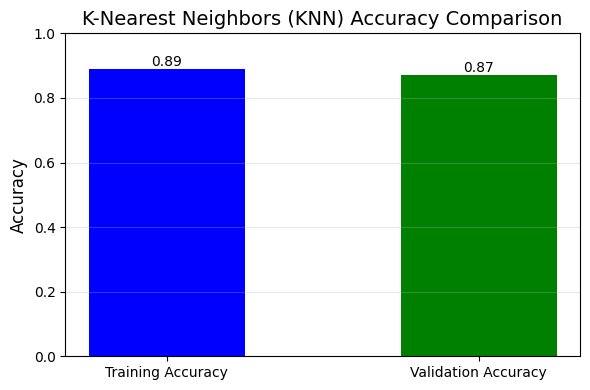

In [ ]:
import matplotlib.pyplot as plt

# Training and Validation accuracy for KNN
train_accuracy = 0.89  # Replace with actual training accuracy for KNN
val_accuracy = 0.87    # Replace with actual validation accuracy for KNN

# Labels and values
metrics = ['Training Accuracy', 'Validation Accuracy']
values = [train_accuracy, val_accuracy]

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['blue', 'green'], width=0.5)

# Adding text annotations
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', fontsize=10)

# Titles and labels
plt.title("K-Nearest Neighbors (KNN) Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1 for better visualization
plt.grid(axis='y', alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


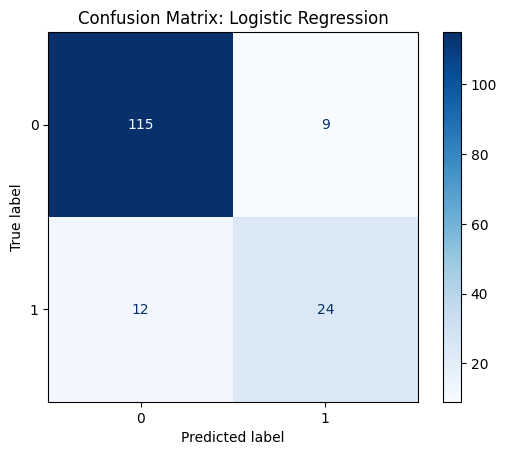

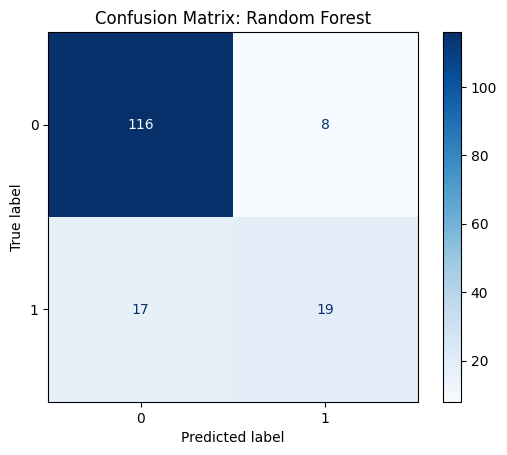

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:37:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


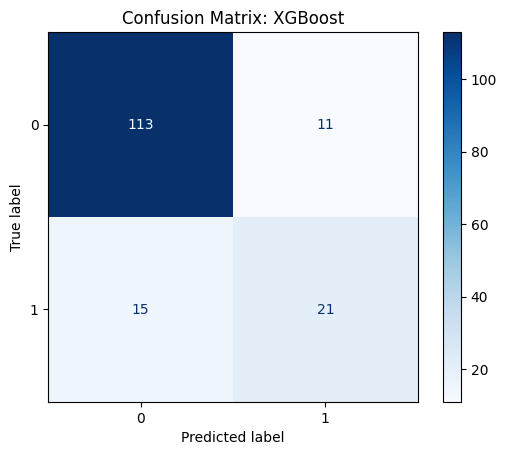

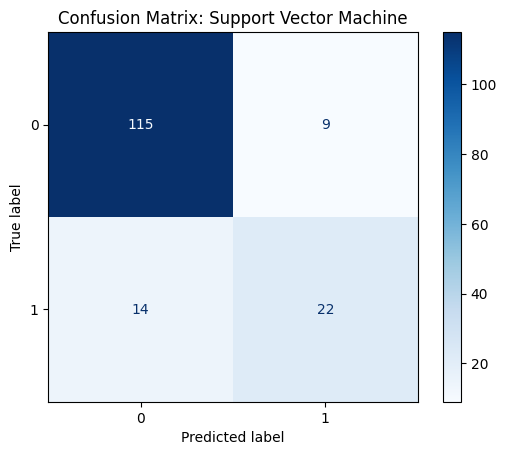

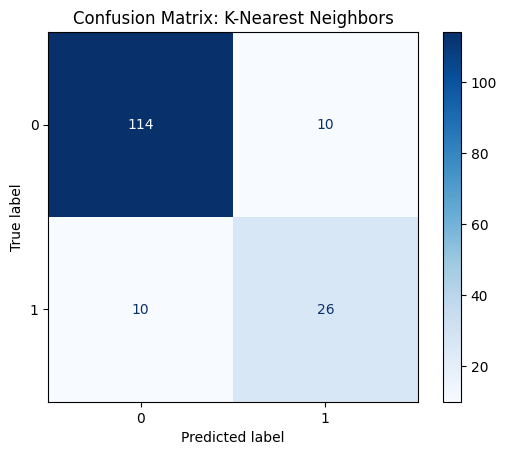

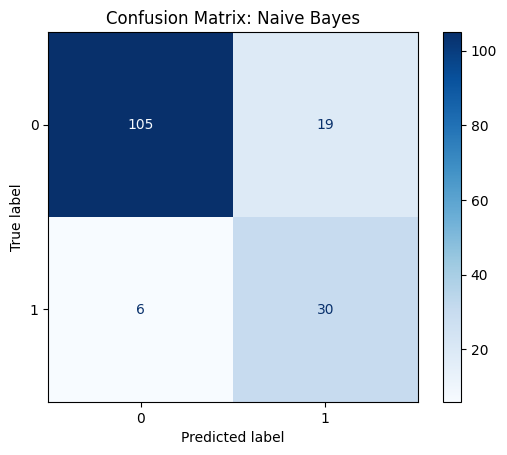

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to train, evaluate, and plot confusion matrix for each model
def evaluate_model_with_cm(model, model_name):
    model.fit(X_train, y_train)

    # Predictions for training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)




    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# Initialize each model and evaluate
evaluate_model_with_cm(LogisticRegression(), "Logistic Regression")
evaluate_model_with_cm(RandomForestClassifier(), "Random Forest")
evaluate_model_with_cm(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")
evaluate_model_with_cm(SVC(), "Support Vector Machine")
evaluate_model_with_cm(KNeighborsClassifier(), "K-Nearest Neighbors")
evaluate_model_with_cm(GaussianNB(), "Naive Bayes")

